# PART 4
---

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('bioactivity_data_pIC50_after_PaDEL_descriptors.csv')

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1469,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1470,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1471,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df.pIC50
Y

0       5.148736
1       4.301029
2       5.267598
3       5.180449
4       4.292429
          ...   
1468    4.999996
1469    5.721224
1470    5.999957
1471    5.999957
1472    4.999996
Name: pIC50, Length: 1473, dtype: float64

In [5]:
X.shape

(1473, 881)

In [6]:
Y.shape

(1473,)

Reducir la dimensionalidad del conjunto de datos y eliminar características que no aportan mucha información debido a su falta de variabilidad.

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(1473, 154)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [68]:
X_train.shape, Y_train.shape

((1178, 154), (1178,))

In [69]:
X_test.shape, Y_test.shape

((295, 154), (295,))

### Crear el modelo de regresión (Random Forest)

In [72]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.03770603598411071

In [73]:
Y_pred = model.predict(X_test)

In [74]:
Y_pred

array([5.02072739, 5.92808146, 4.79207303, 4.80135987, 5.01333564,
       5.60096188, 4.928565  , 4.79576438, 4.92623444, 5.43019319,
       5.14552289, 5.48844319, 5.45261833, 4.891395  , 5.39113568,
       5.45261833, 4.79207303, 4.91806238, 4.40008501, 5.34801451,
       5.47574281, 4.99405162, 5.05125478, 4.80333224, 4.84713427,
       5.52822076, 5.53435647, 5.4303767 , 5.5950483 , 5.37674517,
       5.59938576, 4.40008501, 4.95341435, 5.73221505, 5.10695539,
       5.37819849, 4.76718994, 5.46665602, 5.04269604, 5.29729112,
       5.04421687, 4.20065687, 4.72232055, 5.45374049, 4.60967322,
       4.88874772, 5.14861699, 4.79207303, 5.49545189, 4.91806238,
       4.63471352, 5.31232681, 5.32844875, 5.23856136, 5.0621672 ,
       5.36068493, 3.13668848, 5.39664451, 4.89168999, 5.02262137,
       4.52717265, 4.56553051, 5.47626667, 3.8204882 , 5.37674517,
       4.9321631 , 4.40008501, 5.38850678, 4.91806238, 5.30156192,
       4.73963148, 5.34846166, 4.77715384, 5.47194782, 4.56519

### Scatter Plot Experimental vs valores pIC50 

<function matplotlib.pyplot.show(close=None, block=None)>

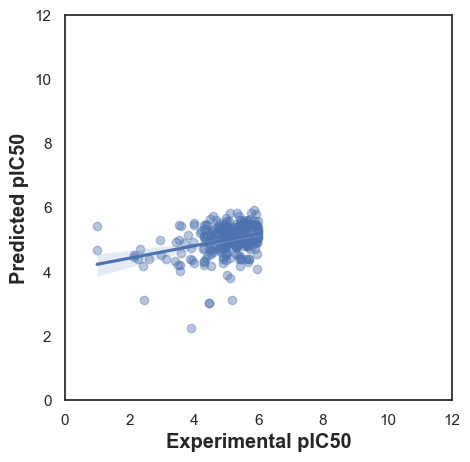

In [75]:
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)

plt.show